In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [4]:
data = pd.read_csv('whitewine_quality.csv')
features = data.drop('quality', axis=1)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

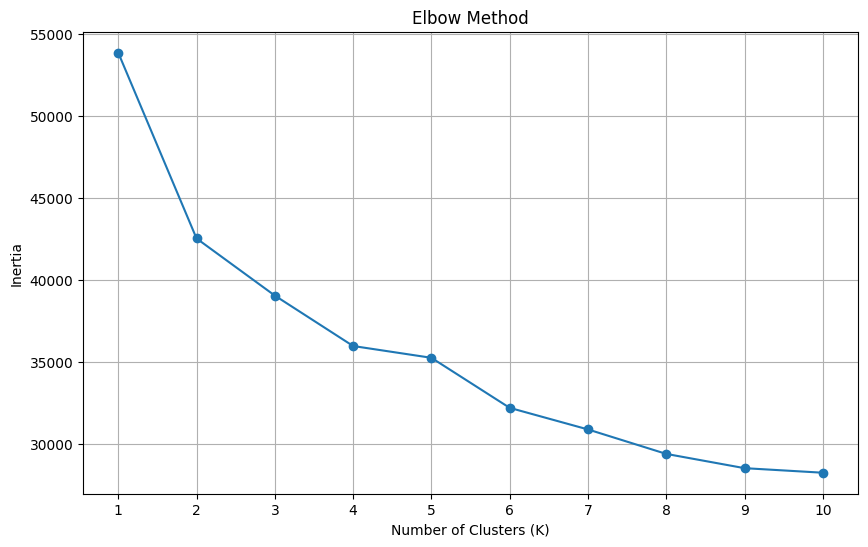

In [11]:
inertia = []
K = range(1, 11) 

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(K)
plt.grid()
plt.show()


In [7]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)

data['KMeans_Cluster'] = kmeans_labels


In [8]:
# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=optimal_k)
hierarchical_labels = hierarchical.fit_predict(scaled_features)

# Add labels to the original dataframe
data['Hierarchical_Cluster'] = hierarchical_labels


In [9]:
# Silhouette Scores
kmeans_silhouette = silhouette_score(scaled_features, kmeans_labels)
hierarchical_silhouette = silhouette_score(scaled_features, hierarchical_labels)

print(f'K-Means Silhouette Score: {kmeans_silhouette}')
print(f'Hierarchical Silhouette Score: {hierarchical_silhouette}')


K-Means Silhouette Score: 0.1200598756155848
Hierarchical Silhouette Score: 0.09990694941178574


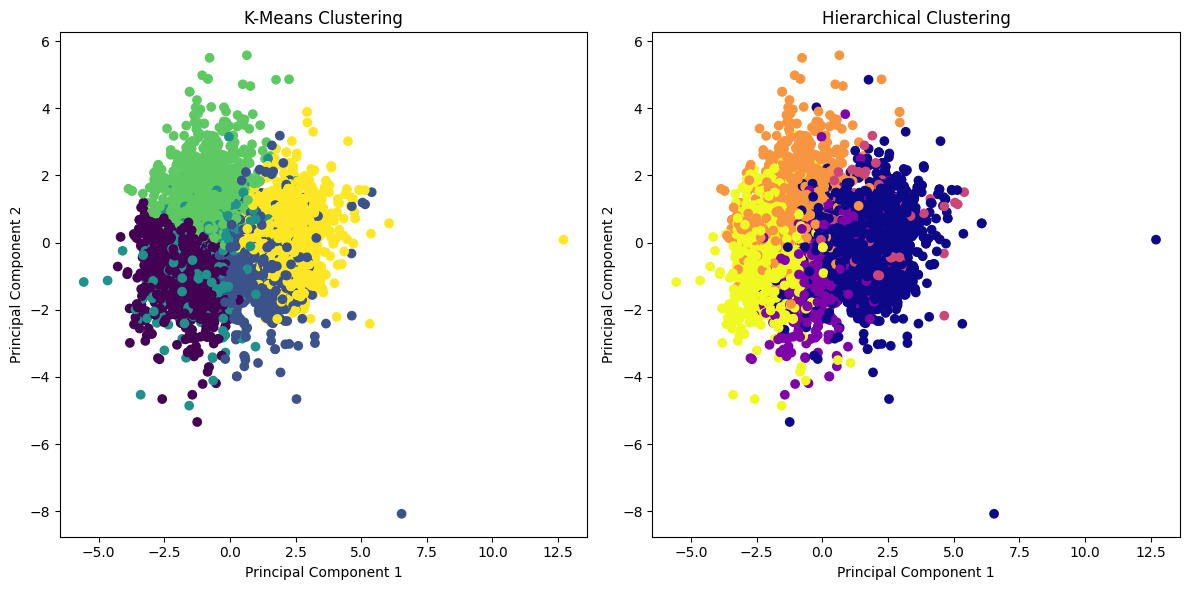

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

plt.figure(figsize=(12, 6))

# K-Means Clustering Visualization
plt.subplot(1, 2, 1)
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Hierarchical Clustering Visualization
plt.subplot(1, 2, 2)
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=hierarchical_labels, cmap='plasma')
plt.title('Hierarchical Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()
